In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./data/sales.csv')

In [ ]:
df.dropna(subset=['price'], inplace=True)

In [ ]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [ ]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year

train_raw = df[df.year < 2015].reset_index(drop=True)
test_raw = df[df.year >= 2015].reset_index(drop=True)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
target = 'price'
def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',', '')
    return float(x)

In [ ]:
y_train = train_raw[target].map(price2num)
y_test = test_raw[target].map(price2num)

# 1. Dummy Transformer

<font color='red'>Assignment:</font> Build a **Dummy Value Transformer** and wrap it up with **LinearRegression** and **RandomForestRegressor** respectively to predict **price** using **product_type**. Compare the performance of these two models.

In [ ]:
class Dummy_Transformer(object):
    
    def fit(self, X, y=None):
        self.keys = set(X)
    
    def transform(self, X, y=None):
        res = {}
        for key in self.keys:
            res[key] = [0]*len(X)    
        for i, item in enumerate(X):
            if item in self.keys:
                res[item][i] = 1
        return pd.DataFrame(res)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)        

In [ ]:
dummytf = Dummy_Transformer()

In [ ]:
dummytf.fit_transform(df.product_type).head()

,"N,D","U,R",D,S,J,"T,H",L,"Q,N","D,A","K,H",...,"F,D","L,A","T,A","R,V","Q,H",E,"H,M","K,D","D,H",W
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


train MAE: 1.25e+05
train MSE: 3.54e+10
train R2: 0.170
test MAE: 1.46e+05
test MSE: 6.43e+10
test R2: 0.254


Text(0, 0.5, 'y_test_pred')

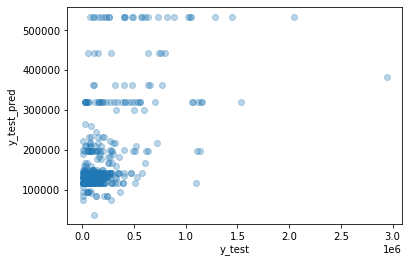

In [ ]:
steps = [('dummytf', Dummy_Transformer()),
         ('lr', LinearRegression())]
pipe = Pipeline(steps)

model = pipe.fit(train_raw.product_type, y_train)

y_train_pred = model.predict(train_raw.product_type)

y_test_pred = model.predict(test_raw.product_type)

print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

train MAE: 1.25e+05
train MSE: 3.54e+10
train R2: 0.170
test MAE: 1.46e+05
test MSE: 6.43e+10
test R2: 0.254


Text(0, 0.5, 'y_test_pred')

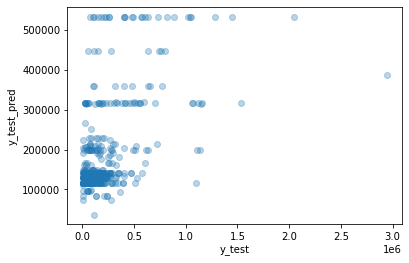

In [ ]:
steps = [('dummytf', Dummy_Transformer()),
         ('rf', RandomForestRegressor())]
pipe = Pipeline(steps)

model = pipe.fit(train_raw.product_type, y_train)

y_train_pred = model.predict(train_raw.product_type)

y_test_pred = model.predict(test_raw.product_type)

print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

<BarContainer object of 64 artists>

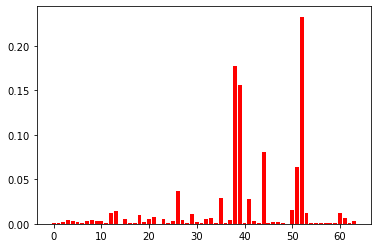

In [ ]:
importances = model.steps[1][1].feature_importances_
plt.bar(range(len(importances)), importances, color="r", align = "center")

In [ ]:
# split the types

class Dummy_Transformer:
    
    def __init__(self):
        self.keys = None
        
    def fit(self, X, y=None):
        # Input: X, Series
        types = set()
        for x in X:
            x = set(x.split(','))
            types = types | x
        self.keys = types
    
    def transform(self, X, y=None):
        # Input: X, Series
        # Output: DataFrame
        res = {}
        for key in self.keys:
            res[key] = [0]*len(X)
        for i in range(len(X)):
            row = X.iloc[i].split(',')
            for j in row:
                res[j][i] = 1
        return pd.DataFrame(res)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [ ]:
dummytf = Dummy_Transformer()

In [ ]:
dummytf.fit_transform(df.product_type).head()

,I,D,J,S,L,F,C,K,U,R,...,T,P,Q,G,O,A,V,H,E,W
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


train MAE: 1.30e+05
train MSE: 3.74e+10
train R2: 0.123
test MAE: 1.48e+05
test MSE: 6.79e+10
test R2: 0.213


Text(0, 0.5, 'y_test_pred')

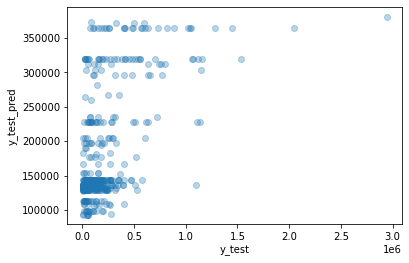

In [ ]:
steps = [('dummytf', Dummy_Transformer()),
         ('lr', LinearRegression())]
pipe = Pipeline(steps)

model = pipe.fit(train_raw.product_type, y_train)

y_train_pred = model.predict(train_raw.product_type)

y_test_pred = model.predict(test_raw.product_type)

print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

train MAE: 1.25e+05
train MSE: 3.54e+10
train R2: 0.170
test MAE: 1.46e+05
test MSE: 6.42e+10
test R2: 0.255


Text(0, 0.5, 'y_test_pred')

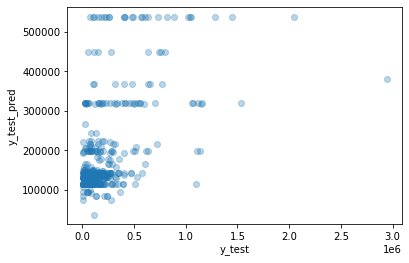

In [ ]:
steps = [('dummytf', Dummy_Transformer()),
         ('rf', RandomForestRegressor())]
pipe = Pipeline(steps)

model = pipe.fit(train_raw.product_type, y_train)

y_train_pred = model.predict(train_raw.product_type)

y_test_pred = model.predict(test_raw.product_type)

print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

# 2. Frequence Transformer

<font color='red'>Assignment:</font> Repeat above steps using **Frequence Transformer**.

In [ ]:
level_dict_f = {}
keys = list(df.product_type.unique())
values = []
for i in range(len(keys)):
    values.append(df[df['product_type'] == keys[i]]['product_type'].count())

In [ ]:
level_dict_f = dict(zip(keys, values))
level_dict_f

{'Q,B': 26,
 'J,D': 96,
 'U': 179,
 'D,R': 166,
 'H': 225,
 'S': 19,
 'B,A': 66,
 'K,D': 27,
 'N': 203,
 'U,A': 55,
 'D': 485,
 'H,A': 39,
 'G': 22,
 'D,A': 81,
 'T,H': 54,
 'D,H': 94,
 'F': 17,
 'A': 135,
 'Q,A': 10,
 'W': 15,
 'F,D': 42,
 'R': 62,
 'P,H': 44,
 'C': 201,
 'Q,H': 39,
 'U,H': 59,
 'J': 33,
 'N,D': 30,
 'F,H': 46,
 'Q,D': 7,
 'V,H': 14,
 'W,D': 4,
 'S,N': 30,
 'N,U': 28,
 'F,U': 21,
 'P,P': 23,
 'S,A': 48,
 'U,R': 14,
 'J,B': 67,
 'I,M': 6,
 'B,D': 8,
 'H,M': 11,
 'S,U': 29,
 'K,H': 17,
 'S,B': 25,
 'T,D': 36,
 'F,A': 20,
 'K': 50,
 'V': 22,
 'N,A': 29,
 'B': 24,
 'R,V': 2,
 'E': 11,
 'U,D': 8,
 'L,A': 8,
 'L': 5,
 'K,A': 6,
 'S,D': 16,
 'Q,N': 8,
 'T,A': 3,
 'O': 2,
 'B,R': 1,
 'N,L': 3,
 'K,S': 10}

In [ ]:
class Freq_Transformer(object):
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['product_type'] = X.product_type.map(self.type2freq)
        return df
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

    def type2freq(self, x):
        return level_dict_f[x]  

In [ ]:
# Quick test of Freq_Transformer
ftf = Freq_Transformer()
ftf.fit_transform(train_raw).head()

,product_type
0,26
1,96
2,96
3,166
4,225


train MAE: 1.36e+05
train MSE: 4.23e+10
train R2: 0.006
test MAE: 1.68e+05
test MSE: 8.63e+10
test R2: -0.001


Text(0, 0.5, 'y_test_pred')

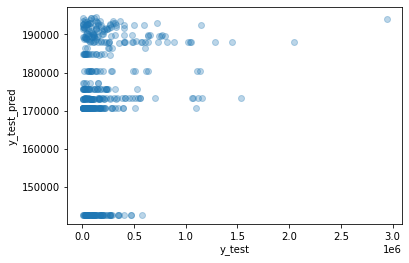

In [ ]:
steps = [('ftf', Freq_Transformer()),
         ('lr', LinearRegression())]
pipe = Pipeline(steps)

model = pipe.fit(train_raw, y_train)

y_train_pred = model.predict(train_raw)

y_test_pred = model.predict(test_raw)

print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

train MAE: 1.26e+05
train MSE: 3.57e+10
train R2: 0.161
test MAE: 1.47e+05
test MSE: 6.57e+10
test R2: 0.237


Text(0, 0.5, 'y_test_pred')

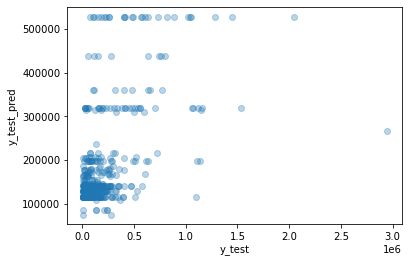

In [ ]:
steps = [('ftf', Freq_Transformer()),
         ('rf', RandomForestRegressor())]
pipe = Pipeline(steps)

model = pipe.fit(train_raw, y_train)

y_train_pred = model.predict(train_raw)

y_test_pred = model.predict(test_raw)

print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

# 3. Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

<font color='red'>Question:</font> What does **LabelEncoder** do?

LabelEncoder is one way to convert categorical (or numerical values) into numerical values, specifically, to values between 0 and n_classes-1. (vs One Hot is just Dummy transformer).

It is not a very common encoding method for features.

**Example:** The **LabelEncoder** module in **sklearn** can't be used in a **Pipeline** dicrectly, because it only takes one variable (X) as input. We can build a new module which is a **child class** of the **sklearn** module for **Pipeline**. You don't have to understand it now.

In [ ]:
class newLabelEncoder(LabelEncoder):
    
    def fit(self, X, y=None):
        return super().fit(X)
    
    def transform(self, X, y=None):
        return pd.DataFrame({'label': super().transform(X)})
    
    def fit_transform(self, X, y=None):
        return pd.DataFrame({'label': super().fit_transform(X)})

<font color='red'>Assignment:</font> Wrap up **newLabelEncoder** with **LinearRegression** and **RandomForestRegressor** respectively to predict **price** using **product_type**. Compare the performance of these two models.

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit_transform(train_raw.product_type)

array([40, 23, 23, ..., 22, 44, 31])

train MAE: 1.36e+05
train MSE: 4.25e+10
train R2: 0.002
test MAE: 1.69e+05
test MSE: 8.65e+10
test R2: -0.003


Text(0, 0.5, 'y_test_pred')

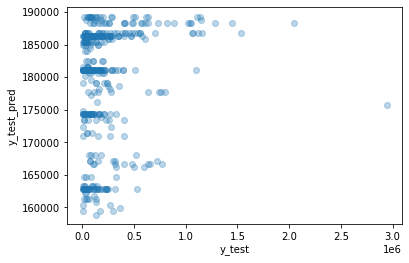

In [ ]:
steps = [('nle', newLabelEncoder()),
         ('lr', LinearRegression())]
pipe = Pipeline(steps)

model = pipe.fit(train_raw.product_type, y_train)

y_train_pred = model.predict(train_raw.product_type)

y_test_pred = model.predict(test_raw.product_type)

print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

train MAE: 1.25e+05
train MSE: 3.54e+10
train R2: 0.170
test MAE: 1.46e+05
test MSE: 6.43e+10
test R2: 0.254


Text(0, 0.5, 'y_test_pred')

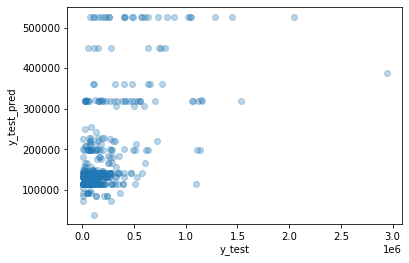

In [ ]:
steps = [('nle', newLabelEncoder()),
         ('rf', RandomForestRegressor())]
pipe = Pipeline(steps)

model = pipe.fit(train_raw.product_type, y_train)

y_train_pred = model.predict(train_raw.product_type)

y_test_pred = model.predict(test_raw.product_type)

print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

plt.scatter(y_test, y_test_pred, alpha = 0.3)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

<font color='red'>Question:</font> Do you think it is a good idea to use Lable Encoder in linear regression? Why does it work for tree-based models?

### It is not a good idea to use Label Encoder for linear regression. It implies ordinal relation among the feature entries which is not always true. It works for tree-based models because of the random combinations of feature entires waters down the ordinal effect. 
### In general, One Hot is better. However, if the number of levels in the categorical feature is big,  we might have memory issue storing the matrix. Label Encoder uses much less disk space. 
## One Hot Combined with PCA to reduce dimension of features is a good idea.
also can check on feature importance ranking from the emsemble trees, and remove non-important features